## Ordering data

In [1]:
import os

ls = os.listdir
ls('../dataset')

['yes', 'no']

In [2]:
#There is some problems in names due to space in them. Let's remove space in all names

yes_path = "../dataset/yes"
no_path = "../dataset/no"

yes_l = ls(yes_path)
no_l = ls(no_path)

In [3]:
# As data is not well organised, we'll create train and valid directories in order to have a good structure

dirs = ["train","train/yes", "train/no", "valid", "valid/yes", "valid/no"]

for _dir in dirs:
    if not os.path.exists(_dir):
        os.mkdir(_dir)

print(ls("train"))
print(ls("valid"))

['yes', 'no']
['yes', 'no']


In [4]:
# We'll use 80% of data for training and 20% for validation

part_yes = round(0.8 * len(yes_l))
part_no = round(0.8 * len(no_l))

train_yes, valid_yes = yes_l[:part_yes], yes_l[part_yes:]
train_no, valid_no = no_l[:part_no], no_l[part_no:]

for img in train_yes:
    os.system(f"cp {yes_path}/{img} train/yes/{img}")
    
for img in train_no:
    os.system(f"cp {no_path}/{img} train/no/{img}")
    
for img in valid_yes:
    os.system(f"cp {yes_path}/{img} valid/yes/{img}")

for img in valid_no:
    os.system(f"cp {no_path}/{img} valid/no/{img}")

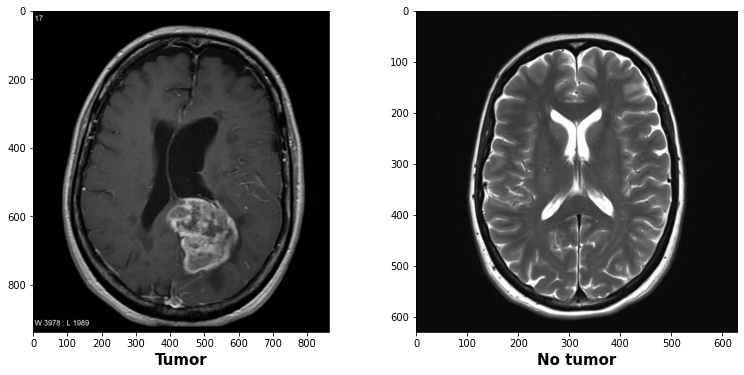

In [5]:
# Let's display some images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_y = mpimg.imread(f"train/yes/{ls('train/yes')[0]}")
img_n = mpimg.imread(f"train/no/{ls('train/no')[0]}")

mapy = {"Tumor": img_y, "No tumor": img_n}

plt.figure(figsize=(13,13))

for i in range(2):
    ks = list(mapy.keys())
    plt.subplot(2, 2, i+1)
    plt.imshow(mapy[ks[i]])
    plt.xlabel(ks[i], fontsize=15, fontweight='bold')

## Data Augmentation

In [6]:
training_dir = 'train/'
valid_dir = 'valid/'

In [7]:
#We'll perform data augmentation by rotating, zooming, shearing, ...

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


## Model building

In [8]:
import tensorflow as tf

# We'll use 5 convolution layers and perform maxpooling operation after each convolution

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
7/7 [==============================] - 15s 2s/step - loss: 0.6613 - binary_accuracy: 0.6040 - val_loss: 0.6351 - val_binary_accuracy: 0.6078
Epoch 2/30
7/7 [==============================] - 14s 2s/step - loss: 0.6578 - binary_accuracy: 0.6089 - val_loss: 0.5936 - val_binary_accuracy: 0.6667
Epoch 3/30
7/7 [==============================] - 10s 1s/step - loss: 0.6427 - binary_accuracy: 0.6436 - val_loss: 0.5562 - val_binary_accuracy: 0.7255
Epoch 4/30
7/7 [==============================] - 14s 2s/step - loss: 0.6276 - binary_accuracy: 0.6683 - val_loss: 0.6134 - val_binary_accuracy: 0.6471
Epoch 5/30
7/7 [==============================] - 9s 1s/step - loss: 0.6308 - binary_accuracy: 0.6485 - val_loss: 0.6090 - val_binary_accuracy: 0.6471
Epoch 6/30
7/7 [==============================] - 15s 2s/step - loss: 0.5966 - binary_accuracy: 0.7030 - val_loss: 0.5552 - val_binary_accuracy: 0.7451
Epoch 7/30
7/7 [==============================] - 13s 2s/step - loss: 0.6269 - binary_acc

## Plotting loss and accuracy

<AxesSubplot:>

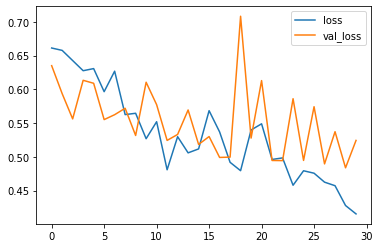

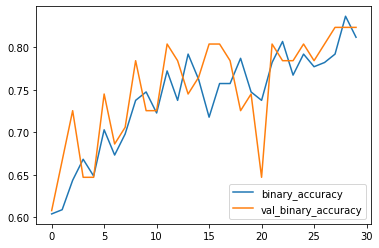

In [10]:
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()